In [3]:
from models.Movie import Movie
from sqlalchemy.orm import Session
from db import Connection

connection = Connection()
with Session(connection.engine) as session:
    movie = session.query(Movie).first()
    print(movie.name)
    ratings = movie.ratings


Toy Story (1995)


<Axes: title={'center': 'Average rating per year for Toy Story (1995)'}, xlabel='year'>

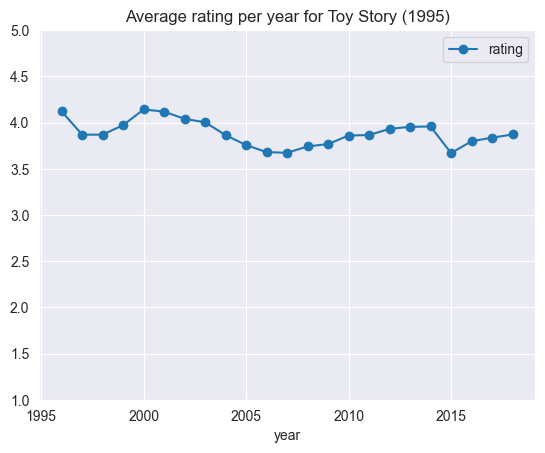

In [4]:
import numpy as np
import pandas as pd
import datetime

res = map(
        lambda r: (datetime.datetime.fromtimestamp(int(r.timestamp)).year, r.rating),
        ratings
    )

ratings_per_movie_df = pd.DataFrame(res, columns = ['year', 'rating'])
ratings_per_movie_df['year'] = ratings_per_movie_df['year'].astype(int)
ratings_per_movie_df.groupby(['year']).mean().plot(title='Average rating per year for %s' % movie.name, marker='o', yticks=[i for i in np.arange(1.0, 5.5, 0.5)])
